In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def forward_euler(f, y0, T, N):
    # f(t_n, y_n) -> y'_n
    # y0 = Initial value
    # T = Final value of t, t varies from 0 to T inclusive
    # N = number of steps
    y = np.array(y0, dtype=float)
    h = float(T)/N
    ts = np.linspace(0, T, N+1)

    out = np.empty(shape=(N+1,y.shape[0]), dtype=float)

    for i, t in enumerate(ts[:-1]):
        out[i] = y
        y += h * f(t, y)
    
    out[N] = y

    return out

def improved_euler(f, y0, T, N):
    # f(t_n, y_n) -> y'_n
    # y0 = Initial value
    # T = Final value of t, t varies from 0 to T inclusive
    # N = number of steps
    y = np.array(y0, dtype=float)
    h = float(T)/N
    ts = np.linspace(0, T, N+1)

    out = np.empty(shape=(N+1,y.shape[0]), dtype=float)

    for i, t in enumerate(ts[:-1]):
        out[i] = y
        yp = y + h * f(t, y)
        y += (h/2) * (f(t, y) + f(t+h, yp))
    
    out[N] = y

    return out

In [3]:
# 1

f = lambda t,y: y
y0 = [1]
T = 1

# Do binary search over N in [1..1000000]
low = 1
high = 1000000

best = None

while low != high:
    mid = int((low+high+1)/2)

    arr = forward_euler(f, y0, T, mid)
    approx = arr[mid,0]
    if str(approx)[:7] == '2.71828':
        high = mid - 1
        best = approx
    else:
        low = mid
    
print(f'Step size N = {low+1} returns y_N = {best}')

Step size N = 743325 returns y_N = 2.7182800000001017


In [4]:
# 2

f = lambda t,y: y
y0 = [1]
T = 1

# Do binary search over N in [1..1000]
low = 1
high = 1000

best = None

while low != high:
    mid = int((low+high+1)/2)

    arr = improved_euler(f, y0, T, mid)
    approx = arr[mid,0]
    if str(approx)[:7] == '2.71828':
        high = mid - 1
        best = approx
    else:
        low = mid

print(f'Step size N = {low+1} returns y_N = {best}')

Step size N = 498 returns y_N = 2.7182800044357713


In [5]:
# 3a

def f(t,ys):
    a = 0.024
    g = 9.8

    u = ys[2]
    v = ys[3]
    vnorm = np.sqrt(u**2 + v**2)

    return np.array([u, v, -a*vnorm*u, -g-a*vnorm*v])

vel = np.sqrt(25.0**2 / 2)
y0 = np.array([0.,0.,vel,vel])
T = 2

N = 100

R_N = improved_euler(f, y0, T, N)[N,0]
R_2N = improved_euler(f, y0, T, 2*N)[2*N,0]
R_4N = improved_euler(f, y0, T, 4*N)[4*N,0]

print(f'R = {(R_N - R_2N) / (R_2N - R_4N)}')

R = 4.050960539872863


In [6]:
# 3b

def improved_euler_break(f, y0, T, N):
    # f(t_n, y_n) -> y'_n
    # y0 = Initial value
    # T = Final value of t, t varies from 0 to T inclusive
    # N = number of steps
    y = np.array(y0, dtype=float)
    h = float(T)/N
    ts = np.linspace(0, T, N+1)

    out = np.empty(shape=(N+1,y.shape[0]), dtype=float)

    for i, t in enumerate(ts[:-1]):
        out[i] = y
        yp = y + h * f(t, y)
        y += (h/2) * (f(t, y) + f(t+h, yp))
        if (y[1] < 0):                 
            return out[:i,:] # Break out by returning the truncated array

    return out

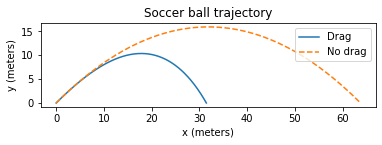

Max height for Drag = 10.373 meters
Max height for No drag = 15.944 meters
Distance to impact for Drag = 31.465 meters
Distance to impact for No drag = 63.774 meters


In [7]:
# 3cde

def fc(t,ys):
    a = 0.024
    g = 9.8

    u = ys[2]
    v = ys[3]
    vnorm = np.sqrt(u**2 + v**2)

    return np.array([u, v, -a*vnorm*u, -g-a*vnorm*v])


def fd(t,ys):
    a = 0
    g = 9.8

    u = ys[2]
    v = ys[3]
    vnorm = np.sqrt(u**2 + v**2)

    return np.array([u, v, -a*vnorm*u, -g-a*vnorm*v])

vel = np.sqrt(25.0**2 / 2)
y0 = np.array([0.,0.,vel,vel])
T = 5

arr_c = improved_euler_break(fc, y0, T, 100000)
arr_d = improved_euler_break(fd, y0, T, 100000)

plt.figure()
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(arr_c[:,0], arr_c[:,1], '-', label="Drag")
plt.plot(arr_d[:,0], arr_d[:,1], '--', label="No drag")
plt.legend()
plt.xlabel("x (meters)")
plt.ylabel("y (meters)")
plt.title("Soccer ball trajectory")
plt.show()

print(f'Max height for Drag = {np.max(arr_c[:,1]):.3f} meters')
print(f'Max height for No drag = {np.max(arr_d[:,1]):.3f} meters')
print(f'Distance to impact for Drag = {arr_c[-1,0]:.3f} meters')
print(f'Distance to impact for No drag = {arr_d[-1,0]:.3f} meters')

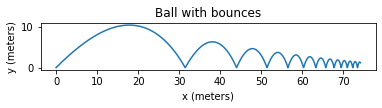

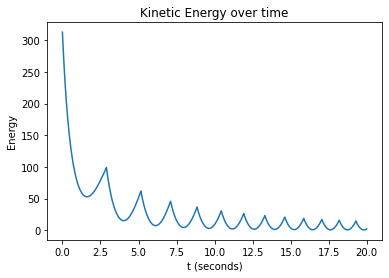

In [8]:
# 3f

def improved_euler_bounce(f, y0, T, N):
    # f(t_n, y_n) -> y'_n
    # y0 = Initial value
    # T = Final value of t, t varies from 0 to T inclusive
    # N = number of steps
    y = np.array(y0, dtype=float)
    h = float(T)/N
    ts = np.linspace(0, T, N+1)

    out = np.empty(shape=(N+1,y.shape[0]), dtype=float)

    for i, t in enumerate(ts[:-1]):
        out[i] = y
        yp = y + h * f(t, y)
        y += (h/2) * (f(t, y) + f(t+h, yp))
        if (y[1] < 0):
            y[3] = -y[3]
    
    out[N] = y

    return out

def f(t,ys):
    a = 0.024
    g = 9.8

    u = ys[2]
    v = ys[3]
    vnorm = np.sqrt(u**2 + v**2)

    return np.array([u, v, -a*vnorm*u, -g-a*vnorm*v])

vel = np.sqrt(25.0**2 / 2)
y0 = np.array([0.,0.,vel,vel])
T = 20
N = 100000

arr = improved_euler_bounce(f, y0, T, N)

plt.figure()
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(arr[:,0], arr[:,1], '-')
plt.xlabel("x (meters)")
plt.ylabel("y (meters)")
plt.title("Ball with bounces")
plt.show()

# Kinetic
xs = np.linspace(0,T,N+1)
ys = np.apply_along_axis(lambda y: (y[2]**2 + y[3]**2)/2.0, 1, arr)

plt.figure()
plt.plot(xs, ys, '-')
plt.xlabel("t (seconds)")
plt.ylabel("Energy")
plt.title("Kinetic Energy over time")
plt.show()

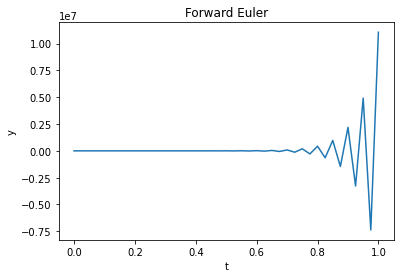

In [9]:
# 4a

def f(t,ys):
    return -100*ys[0]

y0 = np.array([1])
T = 1
N = 40

arr = forward_euler(f, y0, T, N)

plt.figure()
plt.plot(np.linspace(0,T,N+1), arr[:,0], '-')
plt.xlabel("t")
plt.ylabel("y")
plt.title("Forward Euler")
plt.show()

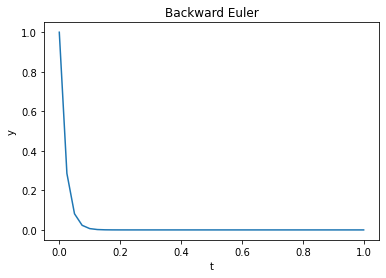

In [10]:
# 4b

T = 1
N = 40

arr = np.empty(shape=(41,))

y = 1
for i in range(N):
    arr[i] = y
    y *= (2/7)

arr[N] = y

plt.figure()
plt.plot(np.linspace(0,T,N+1), arr, '-')
plt.xlabel("t")
plt.ylabel("y")
plt.title("Backward Euler")
plt.show()